In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
import seaborn as sns;sns.set()
import mglearn

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [46]:
%%HTML
<style>
.box {
    border: 1px double dodgerblue;
    padding: 5px;
}
.note {
    font-size: 20;
    color: teal;
    font-weight: bold;
}
.highlight {
    color: green;
    font-family: verdana;
}
.tag {
    background: red;
    color: white;
    padding: 3px;
}
.warning {
    background: red;
    padding: 12px;
    font-size: 24px;
    color: white;
    text-align: center;
    font-family: verdana;
}
.symbol {
    color: white;
    background: green;
    font-size: 20px;
    padding: 2px;
}
</style>

# Decision Tree

<h2>Controlling complexity of Decision Tree</h2>
<p class = 'note'>A decision tree is often overfitting.There are 2 ways to deal with this:
<ul>
    <li>
        <b><i>Pre-pruning</i></b><br/>
        Stop the creation of tree early by controlling:
        <ul class = 'highlight'>
            <li>The maximum depth of the tree: <code>max_depth</code></li>
            <li>the maximum number of leafs: <code>min_samples_leaf</code></li>
            <li>The minimum number to points in a node to keep splitting: <code>min_samples_split</code></li>
        </ul>
    </li>
    <li>
        <b><i>Post-pruning</i></b><br/> 
        Building tree the remove a collapse node that contains little information
    </li>
</ul>
</p>

A Decision tree with no control over complexity:

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=  load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, train_size = .8, test_size = .2, random_state = 42)
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(x_train, y_train)
print('Train score: %.2f' % clf.score(x_train, y_train))
print('Test score: %.2f' % clf.score(x_test, y_test))


Train score: 1.00
Test score: 0.95


The tree fits perfectly the training set, but does not generalize well on the test size because it's overfitting<br/>
Now we will prevent overfitting by limiting the maximum depth:

In [4]:
clf = DecisionTreeClassifier(max_depth = 4, random_state = 0)
clf.fit(x_train, y_train)
print('Train score: %.2f' % clf.score(x_train, y_train))
print('Test score: %.2f' % clf.score(x_test, y_test))


Train score: 1.00
Test score: 0.94


## Feature Importance

<p class = 'note'>Rating how important each feature is for the tree to make decisions</p>

In [5]:
rating = clf.feature_importances_
rating

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.70458252, 0.        , 0.        ,
       0.01221069, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0189077 , 0.0162341 , 0.00639525, 0.        ,
       0.05329492, 0.05959094, 0.05247428, 0.        , 0.00940897,
       0.        , 0.        , 0.06690062, 0.        , 0.        ])

In [6]:
important_feature_names = cancer.feature_names[rating > 0]
important_feature_names

array(['mean concave points', 'radius error', 'concavity error',
       'concave points error', 'symmetry error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst smoothness',
       'worst concave points'], dtype='<U23')

<BarContainer object of 10 artists>

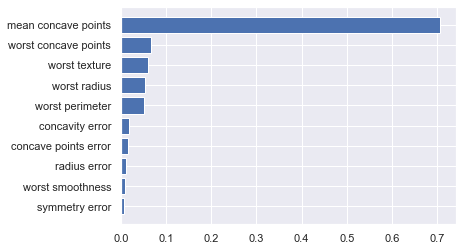

In [7]:
sub_rating = rating[rating > 0]
arg = np.argsort(sub_rating)
plt.barh(important_feature_names[arg], sub_rating[arg])


<h3 class = 'note' style = 'color:red;'>
NOTE: Decision tree is invariant to data scaling
</h3>`

# Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)
print('Train score: %.2f' % clf.score(x_train, y_train))
print('Test score:  %.2f' % clf.score(x_test, y_test))

Train score: 1.00
Test score:  0.96


In [9]:
clf.feature_importances_

array([0.03947496, 0.01906529, 0.02546539, 0.04604356, 0.00804681,
       0.01174978, 0.05716013, 0.0902005 , 0.00341198, 0.00301863,
       0.00624399, 0.00567739, 0.01722779, 0.03269938, 0.00426637,
       0.00415994, 0.01044625, 0.00532829, 0.00524582, 0.00538019,
       0.11662665, 0.02009352, 0.14528276, 0.11860065, 0.01114606,
       0.02082193, 0.02827076, 0.11795097, 0.01244389, 0.00845036])

<BarContainer object of 30 artists>

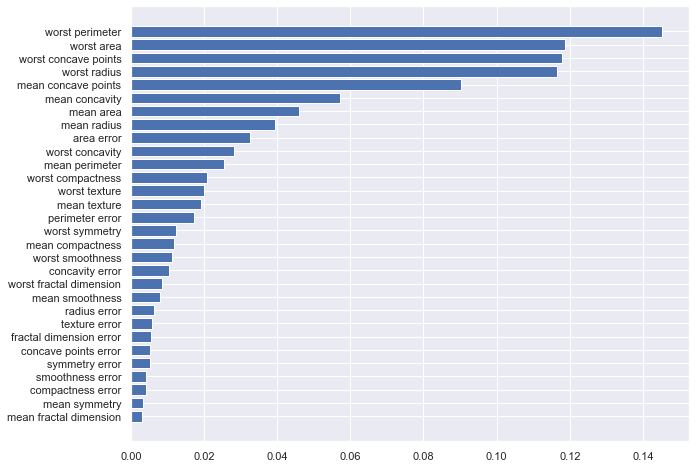

In [10]:
fig = plt.figure(figsize = (10, 8))
arg = np.argsort(clf.feature_importances_)
plt.barh(cancer.feature_names[arg], clf.feature_importances_[arg])

<h3 class = 'note' style = 'color:red'>
NOTE:<br/>
    <p class = 'box'>Random Forest is invariant to feature scaling</p>
<p class = 'box'>The more Decision Trees, the better. A rule of thumb: <i>"As long as you have enough time/memory"</i></p>
</h3>

## Strengths, Weakness and parameters

<h3>Strength</h3>
Among the most widely used algorithm

<h3>Weakness</h3>
Tend to not perform well on large or sparse data (Linear Models is a better choice)

<h3>Parameters</h3>


<ul class = 'note'>
    <li>Random process controlling: <code>n_estimators</code>, <code>max_features</code></li>
    <li>Pre-pruning parameters: <code>max_depth</code>, ....</li>
</ul>

# Gradient Boosting

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, train_size = .8, test_size = .2, random_state = 1)
clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)
print('Train score: %.3f' % clf.score(x_train, y_train))
print('Test score: %.3f' % clf.score(x_test, y_test))

Train score: 1.000
Test score: 0.965


As the training set accuracy is 1, it seems that we are overfitting.<br>
To reduce the variance of the model, we can reduce the number of estimators, or pre-pruning

<p class = 'note'>Plot the validation curve to chose the best value for <code>n_estimators</code></p>

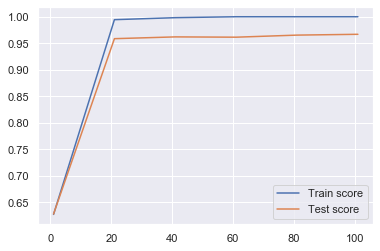

In [23]:
from sklearn.model_selection import validation_curve
values = range(1, 110, 20)
train_score, test_score = validation_curve(GradientBoostingClassifier(), 
                                           cancer.data,
                                           cancer.target,
                                           param_name = 'n_estimators', param_range = values, cv = 50)
train_score = train_score.mean(1)
test_score = test_score.mean(1)
plt.plot(values, train_score, label = 'Train score')
plt.plot(values, test_score, label = 'Test score')
plt.legend(loc = 'best')

<p class = 'note'>After we found the best value for <code>n_estimators</code>, we can tree <i>pre-pruning</i> by find the best value for <code>max_depth</code></p>

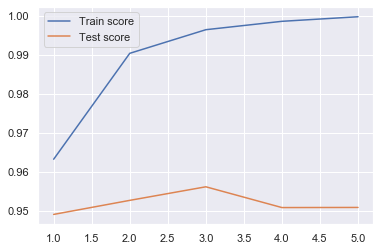

In [29]:
r = range(1, 6)
train_score, test_score = validation_curve(GradientBoostingClassifier(n_estimators = 30), 
                                           cancer.data, cancer.target,
                                           param_name = 'max_depth', 
                                           param_range = r, cv = 10) #10 - fold
train_score = train_score.mean(1)
test_score = test_score.mean(1)
plt.plot(r, train_score, label = 'Train score')
plt.plot(r, test_score, label = 'Test score')
plt.legend()

<b>Analysis:</b>From the above figure, we can see that the best value is <code>max_depth = 3</code>

In [39]:
clf = GradientBoostingClassifier(n_estimators=30, max_depth = 3, learning_rate = .3, random_state = 0)
clf.fit(x_train, y_train)
print('Train score: %.3f' % clf.score(x_train, y_train))
print('Test score: %.3f' % clf.score(x_test, y_test))

Train score: 1.000
Test score: 0.965


<h2>Feature importances</h2>

In [48]:
clf.feature_importances_

array([0.00000000e+00, 2.58607880e-02, 4.75398108e-04, 1.57389171e-04,
       6.57669610e-04, 1.72922436e-04, 1.07979233e-02, 2.80102579e-02,
       2.91030721e-03, 2.07253804e-03, 1.80412217e-03, 8.53660291e-04,
       1.08682748e-03, 7.76980406e-03, 3.17260234e-05, 2.13874007e-04,
       5.65371982e-03, 5.66055609e-04, 1.07158733e-04, 2.88089291e-04,
       9.83206690e-02, 4.97682658e-02, 4.72352148e-01, 1.89987798e-01,
       6.69793946e-03, 1.76409928e-03, 1.58545112e-02, 7.57474654e-02,
       1.68731090e-05, 0.00000000e+00])

Text(0, 0.5, 'Feature')

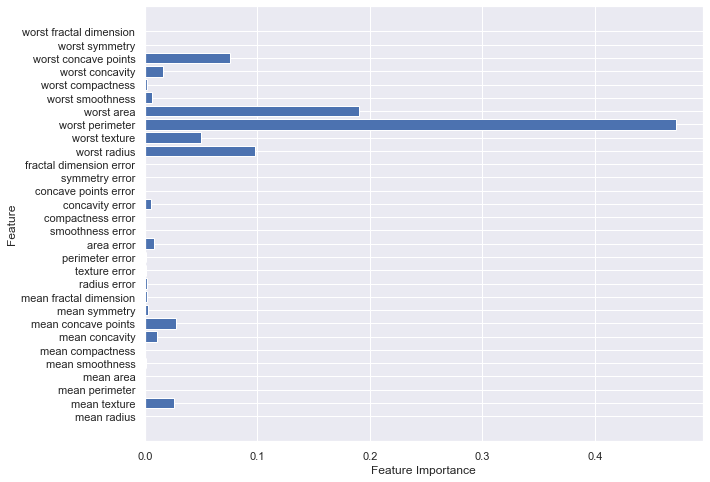

In [51]:
fig = plt.figure(figsize = (10, 8))
plt.barh(cancer.feature_names, clf.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

<h2>Strength, weakness and parameters</h2>
<p class = 'note'>
    <b><u>Strength:</u></b><br>
    Among the most widely used and powerful models for machine learning <span class = 'symbol'>&#9875;</span>
    <br><br>
    <b><u>Weakness:</u></b><br>
    Might take a long time to train <span class = 'symbol'>&#9762;</span><br>
    Require careful tuning <span class = 'symbol'>&#9881;</span>
    <br><br>
    <b><u>Parameters:</u></b>
    <ul class = 'note'>
        <li>
            <code>n_estimators</code>
            In contrast to <b>Random forest</b>, in <b>Gradient Boosting</b>
            increase <code>n_estimators</code>  leads to more complex model
            <span class = 'tag'>Overfitting</span>
        </li>
        <li>
            <code>learning_rate</code>: Control how strongly each tree tries to correct the previous mistake
            <span class = 'tag'>High <code>learning_rate</code> leads to more complex model</span>
        </li>
        <li>
            pre-pruning: <code>max_depth</code>, <code>max_leaf_nodes</code>,...
            <span class = 'tag'>Reduce model complexity</span>
        </li>
    </ul>
</p>